In [344]:
import pandas as pd
import yfinance as yf
from yahoo_fin.stock_info import *
import numpy as np
from datetime import date
import matplotlib.pyplot as plt

In [345]:
class Stock: 

    def __init__(self, ticker, period="1mo"):
        self.ticker = ticker
        self.period = period

# Gets the adjusted close of a ticker per a certain period
    def get_prices(self):
        price_data = get_data(self.ticker, start_date="01/01/2015",end_date = datetime.date.today(), index_as_date = True, interval=self.period)
        adjclose = price_data.loc[:, 'adjclose']
        return adjclose.tolist()


    # Gets a list of the returns per period in percentage form
    def get_period_returns(self):
        adjclose_list = self.get_prices()

    # Loops through the adjusted closes and sums the ubiased daily return divided by the length of the list
        period_returns = []

        for i in range(len(adjclose_list) - 1):
            daily_return = np.log(adjclose_list[i+1]/adjclose_list[i]) * 100
            if np.isnan(daily_return) == False:
                period_returns.append(daily_return)
        
        return period_returns

    # Gets the mean return of the stock per-period
    def get_mean_return(self):
        period_returns = self.get_period_returns()

        mean_return = sum(period_returns)/len(period_returns)
        return mean_return

    # Gets the standard deviation of a certain stock
    def get_risk(self):
        period_returns = self.get_period_returns()
        return (np.std(period_returns, dtype=np.float64))


# Minimum variance portoflio
The following module calculates the weightings of two stocks that give the the least risk

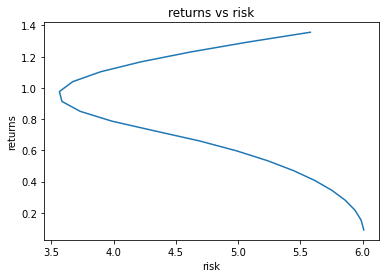

0.548508877221682 0.45149112277831804
1.0706602887683063
3.767358654678774
0.36586741078138707 0.6341325892186129
0.9550101230419139
3.558075074873846


In [346]:
class Portfolio: 
    def __init__(self, ticker_1, ticker_2, period = "1mo"):
        self.stock_1 = Stock(ticker_1, period)    
        self.stock_2 = Stock(ticker_2, period)
    
    def get_return(self, w_1, w_2):
        exp_return = w_1 * self.stock_1.get_mean_return() + w_2 * self.stock_2.get_mean_return()
        return exp_return

    def get_risk(self, w_1, w_2):
        std_1 = self.stock_1.get_risk()
        std_2 = self.stock_2.get_risk()

        if w_1 < 0:
            w_sq_1 = -(w_1**2)
            w_sq_2 = w_2**2
        elif w_2 < 0: 
            w_sq_1 = w_1**2
            w_sq_2 = -(w_2**2)
        else: 
            w_sq_1 = w_1**2
            w_sq_2 = w_2**2
        
        variance = (w_sq_1 * (std_1**2)) + (w_sq_2 * (std_2**2)) + (2 * self.get_corr() * w_1 * w_2 * std_1 * std_2)
        risk = math.sqrt(variance)
        return risk

    # Gets the covariance of the two stocks
    def get_cov(self):
        returns1 = self.stock_1.get_period_returns()
        returns2 = self.stock_2.get_period_returns()

        # Makes the list of returns the same size
        abs_diff = abs(len(returns1) - len(returns2))
        if len(returns1) > len(returns2):
            returns1 = returns1[abs_diff:]
        else: 
            returns2 = returns2[abs_diff:]
        
        cov_matrix = np.cov(returns1,returns2)

        cov = cov_matrix[0,1]
        return cov
        

    def get_corr(self):
        corr = self.get_cov()/(self.stock_1.get_risk() * self.stock_2.get_risk())
        return corr

    def get_min_risk(self):
        std1 = self.stock_1.get_risk()
        std2 = self.stock_2.get_risk()

        numerator = (std2**2) - (self.get_corr() * std1 * std2)
        denominator = (std1**2) + (std2**2) - (2 * self.get_corr() * std1 * std2)

        stock_1_weight = numerator/denominator
        stock_2_weight = 1 - stock_1_weight

        return (stock_1_weight, stock_2_weight)
    
    def get_optimium(self): 
        std_1 = self.stock_1.get_risk()
        std_2 = self.stock_2.get_risk()
        rtrn_1 = self.stock_1.get_mean_return()
        rtrn_2 = self.stock_2.get_mean_return()

        numerator = rtrn_1 * (std_2**2) - rtrn_2 * (self.get_cov())
        denominator = rtrn_1*(std_2**2) + rtrn_2*(std_1**2) - (rtrn_1 + rtrn_2) * self.get_cov()

        stock_1_weight = numerator/denominator
        stock_2_weight = 1 - stock_1_weight

        return (stock_1_weight, stock_2_weight)
    
    def plot_risk_vs_return(self): 
        weights = []
        curr = -1
        while curr <= 1:
            weights.append(round(curr,1))
            curr += 0.1        
        
        returns = [self.get_return(x, 1-x) for x in weights]

        risk = [self.get_risk(x, 1-x) for x in weights]
        plt.plot(risk, returns)

        plt.xlabel('risk')
        plt.ylabel('returns')
        plt.title('returns vs risk')

        plt.show()

s_1 = Stock('NQ=F')
s_2 = Stock('^GSPC')
portfolio = Portfolio('NQ=F', '^GSPC')
portfolio.plot_risk_vs_return()

a,b = portfolio.get_optimium()
print(a,b)
print(portfolio.get_return(a,b))
print(portfolio.get_risk(a,b))

c,d = portfolio.get_min_risk()
print(c,d)
print(portfolio.get_return(c,d))
print(portfolio.get_risk(c,d))




